# TestCase 2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from create_jsonfile import ask_user,read_config,check_config

# ask_user()
config = read_config(configfile="configs/config2.json")

### Configuration has been read from config.json ###
# dimension : 1
# testcase : 2
# version : 2
# error_estimations : {'param_num': 2}
# gains : {'n_params': 100}


In [3]:
dimension = config["dimension"]
testcase = config["testcase"]
version = config["version"]   
# high_degree = 10

In [4]:
assert testcase == 2
check_config(config)

Config file is valid


## Imports + Load network

In [5]:
# export CUDA_VISIBLE_DEVICES=
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from testcases.utils import create_tree

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
current_dir = os.getcwd()
repo_dir = os.path.dirname(current_dir)
repo_dir = os.path.dirname(repo_dir)
print(repo_dir)
# vérifier que repo_dir finit bien par "code" (à modifier pour l'utilisateur)
assert repo_dir.split("/")[-1] == "code"

/home/u2/lecourtier/Article1/code


In [8]:
if version == 1:
    from testcases.networks.test_1D.test_2.test_2_v1 import Run_laplacian1D,Poisson_1D
elif version == 2:
    from testcases.networks.test_1D.test_2.test_2_v2 import Run_laplacian1D,Poisson_1D
else:
    raise ValueError("Version not found")
from testcases.problem.problem_1D import TestCase2
problem = TestCase2(version=version)

Using device: cpu
/home/u2/lecourtier/Article1/code
torch loaded; device is cpu


>> load network /home/u2/lecourtier/Article1/code/networks/test_1D/test_fe2_v2.pth
network loaded
Error  tensor([0.7742])


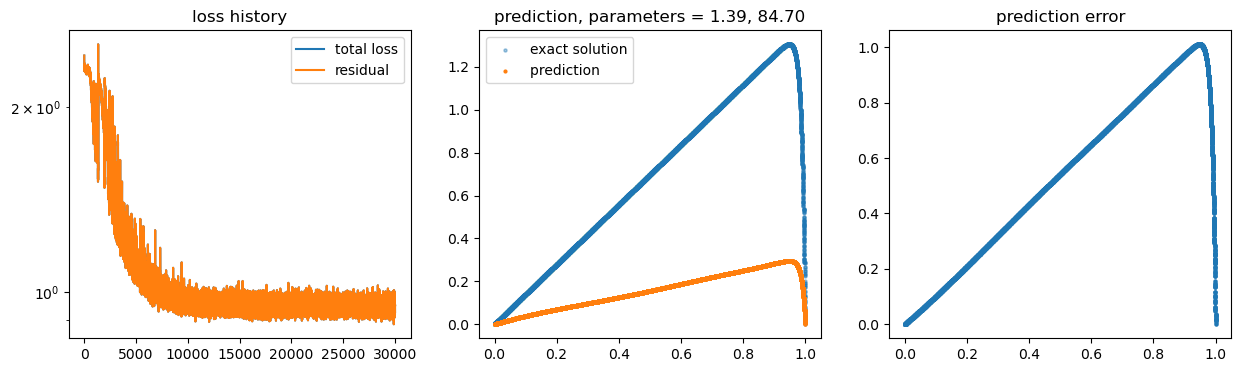

In [9]:
pde = Poisson_1D()
trainer,u_theta = Run_laplacian1D(pde)

## Error estimations

### Imports

In [10]:
from modfenics.error_estimations.error_estimations import ErrorEstimations
from modfenics.error_estimations.compare import CompareMethods

/home/u2/lecourtier/miniconda3/envs/fenics_scimba_modules/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
param_num = config["error_estimations"]["param_num"]     
error_estimations = ErrorEstimations(param_num, problem, repo_dir = repo_dir, tab_degree=[1], save_fig=True)
compare_methods = CompareMethods(error_estimations)
tab_nb_vert = error_estimations.tab_nb_vert

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/cvg/param2/


### Run FEM

In [12]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = error_estimations.run_fem_deg(degree,new_run=False)

## Run error estimation with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  4  : h = 0.06666666666666676
Calling FFC just-in-time (JIT) compiler, this may take some time.
nb_vert=16, norme_L2=0.18540640648450887
V created with  32  vertices and degree  4  : h = 0.032258064516129115
nb_vert=32, norme_L2=0.06313439688237699
V created with  64  vertices and degree  4  : h = 0.015873015873015928
nb_vert=64, norme_L2=0.017690642430850098
V created with  128  vertices and degree  4  : h = 0.007874015748031593
nb_vert=128, norme_L2=0.004536218108490265
V created with  256  vertices and degree  4  : h = 0.0039215686274510775
nb_vert=256, norme_L2=0.0011348100666762999


In [13]:
# error_estimations.run_fem_alldeg(new_run=False,plot_cvg=False)

### Run Add

In [14]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = error_estimations.run_corr_deg(degree,u_theta,new_run=False)

## Run error estimation with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  4  : h = 0.06666666666666676
nb_vert=16, norme_L2=0.1475003516745885
V created with  32  vertices and degree  4  : h = 0.032258064516129115
nb_vert=32, norme_L2=0.05000570538942318
V created with  64  vertices and degree  4  : h = 0.015873015873015928
nb_vert=64, norme_L2=0.014061913708627893
V created with  128  vertices and degree  4  : h = 0.007874015748031593
nb_vert=128, norme_L2=0.0036043490761841932
V created with  256  vertices and degree  4  : h = 0.0039215686274510775
nb_vert=256, norme_L2=0.0009084041668446857


In [15]:
# error_estimations.run_corr_alldeg(u_theta,new_run=False,plot_cvg=False)

### Run Mult

In [16]:
tab_M = [0.0]

Strong :

In [17]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  4  : h = 0.06666666666666676
Calling FFC just-in-time (JIT) compiler, this may take some time.


/home/u2/lecourtier/Article1/code/src/modfenics/solver_fem/FEMSolver.py:401: RuntimeWarning: invalid value encountered in divide
  C_ex.vector()[:] = u_ex_V.vector()[:]/u_theta_V.vector()[:]


nb_vert=16, norme_L2=0.14947437220728868
V created with  32  vertices and degree  4  : h = 0.032258064516129115
nb_vert=32, norme_L2=0.06660564045700199
V created with  64  vertices and degree  4  : h = 0.015873015873015928
nb_vert=64, norme_L2=0.03374842563678336
V created with  128  vertices and degree  4  : h = 0.007874015748031593
nb_vert=128, norme_L2=0.01759928808490155
V created with  256  vertices and degree  4  : h = 0.0039215686274510775
nb_vert=256, norme_L2=0.00917503989815552


In [18]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,plot_cvg=False)

Weak :

In [19]:
degree = 1
error_estimations.run_mult_deg_allM(degree,u_theta,tab_M,impose_bc=False,new_run=False)

## Run error estimation with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
V created with  16  vertices and degree  4  : h = 0.06666666666666676
nb_vert=16, norme_L2=0.001519361668265183
V created with  32  vertices and degree  4  : h = 0.032258064516129115
nb_vert=32, norme_L2=0.00082044234975789
V created with  64  vertices and degree  4  : h = 0.015873015873015928
nb_vert=64, norme_L2=0.0001880287330574748
V created with  128  vertices and degree  4  : h = 0.007874015748031593
nb_vert=128, norme_L2=6.891839391795096e-05
V created with  256  vertices and degree  4  : h = 0.0039215686274510775
nb_vert=256, norme_L2=2.8633992547144692e-05


In [20]:
# error_estimations.run_mult_alldeg_allM(u_theta,tab_M,new_run=False,impose_bc=False,plot_cvg=False)

### Save results

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/cvg/param2/Mult_case2_v2_param2_degree1_M0.0.csv


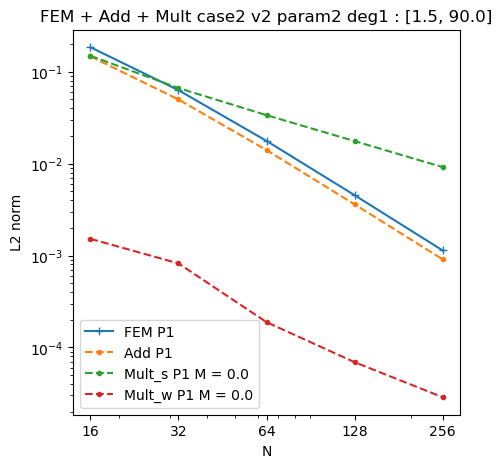

In [21]:
compare_methods.plot_Mult_vs_Add_vs_FEM_alldeg_allM(tab_M)

In [22]:
compare_methods.save_tab_alldeg_allM(tab_M)

/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:189: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[error_cols] = df[error_cols].applymap(lambda x: f'{x:.2e}')
/home/u2/lecourtier/Article1/code/src/modfenics/error_estimations/compare.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[factor_cols] = df[factor_cols].applymap(lambda x: f'{round(x,2)}')


## Gains

### Imports

In [23]:
from modfenics.gains.gains import GainsEnhancedFEM
from modfenics.gains.compare import CompareGainsMethods
# from modfenics.gains.compare import create_dataframes_deg,create_dataframes_all,save_stats_deg,save_stats_all

In [24]:
n_params = config["gains"]["n_params"]   
gains_enhanced_fem = GainsEnhancedFEM(n_params, problem, repo_dir = repo_dir, tab_degree=[1])
compare_gains_methods = CompareGainsMethods(gains_enhanced_fem)

## Results directory: /home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/


### Run FEM

In [25]:
degree = 1
df_FEM, tab_h_FEM, tab_err_FEM = gains_enhanced_fem.run_fem_deg(degree,new_run=False)

## Run errrors with FEM for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [26]:
# gains_enhanced_fem.run_fem_alldeg(new_run=False)

### Run PINNs

In [27]:
degree = 1
df_PINNs, tab_h_PINNs, tab_err_PINNs = gains_enhanced_fem.run_pinns_deg(degree,u_theta,new_run=False)

## Run errrors with PINNs for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [28]:
# gains_enhanced_fem.run_pinns_alldeg(new_run=False)

### Run Add

In [29]:
degree = 1
df_Corr, tab_h_Corr, tab_err_Corr = gains_enhanced_fem.run_corr_deg(degree,u_theta,new_run=False)

## Run errrors with Corr for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [30]:
# gains_enhanced_fem.run_corr_alldeg(u_theta,new_run=False)

### Run Mult

In [31]:
tab_M = [0.0]

Strong :

In [32]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,new_run=False)

## Run errrors with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [33]:
# gains_enhanced_fem.run_mult_alldeg_allM(u_theta,tab_M,new_run=False)

Weak :

In [34]:
degree = 1
gains_enhanced_fem.run_mult_deg_allM(degree,u_theta,tab_M,impose_bc=False,new_run=False)

## Run errrors with Mult for degree=1
V_ex created with  501  vertices and degree  4  : h_ex = 0.0020000000000000018
nb_vert=20
V created with  20  vertices and degree  4  : h = 0.052631578947368474
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 nb_vert=40
V created with  40  vertices and degree  4  : h = 0.02564102564102566
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [35]:
# gains_enhanced_fem.run_mult_alldeg_allM(u_theta,tab_M,impose_bc=False,new_run=False)

### Compare methods

In [36]:
degree = 1
# df_errors,df_gains = 
df_errors = compare_gains_methods.create_dferrors_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv


In [37]:
df_gains = compare_gains_methods.create_dataframes_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv


In [38]:
# compare_gains_methods.create_dataframes_alldeg_allM(tab_M)

In [39]:
df_stats = compare_gains_methods.save_stats_deg_allM(degree,tab_M)

/home/u2/lecourtier/Article1/code/results/fenics/test_1D/testcase2/version2/gains/FEM_errors_case2_v2_degree1.csv
method                PINNs                                FEM          \
type                    min       max     mean      std    min     max   
method       n_vert                                                      
Corr         20        6.98     94.66    17.98    16.74   1.20   48.26   
             40       21.11    372.28    68.74    70.46   1.20   43.74   
Mult0.0      20        5.02     19.16     9.32     2.49   0.33   12.68   
             40        9.94     38.83    18.85     4.45   0.16    6.34   
Mult_weak0.0 20       75.82   6276.47  1476.11  1086.00  65.90  352.37   
             40      280.58  25023.19  4439.87  3659.46  56.69  255.11   

method                              
type                   mean    std  
method       n_vert                 
Corr         20        3.34   6.37  
             40        3.29   6.10  
Mult0.0      20        1.58   1.70

/home/u2/lecourtier/Article1/code/src/modfenics/gains/compare.py:251: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_stats_round = df_stats.applymap(lambda x: f"{x:.2f}")
